<a href="https://colab.research.google.com/github/woneuy01/AudioToText/blob/master/Reddit_NLP_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 13 documents

Resulting matrix has 13 data points and 1701 features.

[('new', 1.23632388392977), ('reopen', 1.099280564636044), ('mask', 1.0020677509678293), ('death', 0.9942406825489047), ('case', 0.8291736758467345), ('state', 0.7578936280576936), ('daili', 0.7393651460613693), ('theori', 0.6592388672811563), ('unconfirm', 0.6352174753598768), ('peopl', 0.6227962930924514), ('die', 0.5760276886890493), ('lockdown', 0.5731806627535535), ('$', 0.5709378227760995), ('no', 0.5654009178305464), ('vaccin', 0.5601147143744787), ('worker', 0.5581779080841808), ('studi', 0.5547335565339607), ('million', 0.5541505927163098), ('wear', 0.5449153452178668), ('test', 0.5381235753225134), ('social', 0.4945852904998513), ('governor', 0.4934570563153145),

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


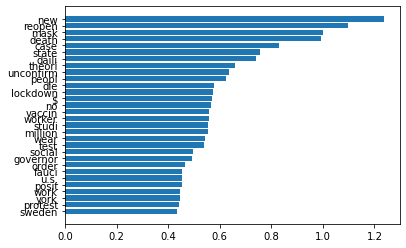

In [37]:
#stemming 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
#'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 
#'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
# 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
#'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
# 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
# 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
#'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 
#'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 
#'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
# 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
# "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 13 documents

Resulting matrix has 13 data points and 3910 features.



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[('unconfirm theori', 0.5563388570320467), ('new york', 0.393785754693902), ('wear mask', 0.38417638404721083), ('social distanc', 0.3641768867593386), ('white hous', 0.3219663151336891), ('new case', 0.2956301931307017), ('death toll', 0.28174481035664445), ('face mask', 0.272436247409399), ('test posit', 0.27171532808395676), ('theori daili', 0.25576824893827765), ('herd immun', 0.20314842497596114), ('state reopen', 0.20067945081044203), ('salon owner', 0.19526662174222068), ('studi find', 0.1869372177241363), ('unit state', 0.18127894110821086), ('reopen state', 0.18093888806002006), ('stay-at-hom order', 0.17089507153216105), ('new studi', 0.16697948599885898), ('u.s. death', 0.16560655397124902), ('24 hour', 0.16305960343369913), ('daili death', 0.16278495762009615), ('michigan capitol', 0.16123370124437636), ('second wave', 0.1611792712361681), ('reopen economi', 0.1568316429494065), ('sinc march', 0.15150663097509529), ('nurs home', 0.14877139067779407), ('go away', 0.143936812

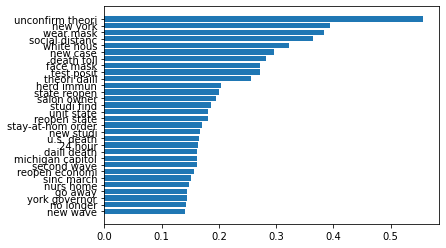

In [38]:
#stemming 2-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 13 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 13 data points and 4210 features.

[('unconfirm theori daili', 0.2537143117529871), ('new york governor', 0.1432732926054704), ('wear face mask', 0.1335945335001667), ('staffer test posit', 0.12680103677920002), ('governor wear mask', 0.1260147507684493), ('michigan capitol denounc', 0.11032702500828495), ('sentenc 7 jail', 0.10641697269366222), ('link vitamin defici', 0.10521973276367905), ('no social distanc', 0.10457092009999301), ('carniv cruis book', 0.09964879144008466), ('daili death toll', 0.09946362785538712), ('1,000 new case', 0.09867130935523877), ('million n95 mask', 0.09657180784825936), ('unit state lowest', 0.09527307259480916), ('lowest daili death', 0.09527307259480916), ('highest death rate', 0.09405624357390216), ('wear mask public', 0.09176676215601036), ('new york citi', 0.09176676215601036), ('told wear face', 0.08973979188437134), ('former cdc head', 0.08938645740359152), ('employe work home', 0.0887438971794417), ('reach herd immun', 0.087

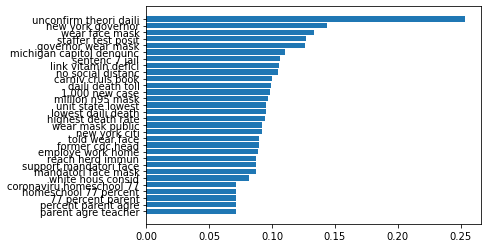

In [39]:
#stemming 3-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))       


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]
print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents

Resulting matrix has 13 data points and 1755 features.

[('new', 1.2346639905472203), ('reopen', 1.099207942588702), ('mask', 1.0038334163146445), ('case', 0.8298519504121886), ('pandemic', 0.7820941914224427), ('state', 0.7577136149806782), ('deaths', 0.6870498483265703), ('theories', 0.6596999750048683), ('wear', 0.6359660167042865), ('unconfirmed', 0.6358349739103106), ('die', 0.5790433893743552), ('$', 0.5701171691518371), ('no', 0.5665892329060851), ('death', 0.5535658245241623), ('test', 0.5391552586787662), ('vaccine', 0.5351539897072837), ('get', 0.522695938000151), ('lockdown', 0.5164753322799326), ('socia

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


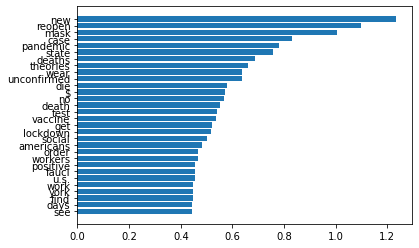

In [40]:
#lemmatization 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents

Resulting matrix has 13 data points and 3864 features.

[('unconfirmed theories', 0.5605097889635254), ('wear mask', 0.4654489859878459), ('new york', 0.3961128646596292), ('social distance', 0.36691143053367103), ('white house', 0.3234899591503267), ('new case', 0.29770195199456484), ('death toll', 0.2832215223423797), ('face mask', 0.27423325106336177), ('test positive', 0.2738493968058685), ('herd immunity', 0.20430141511131827), ('state reopen', 0.20192135225729266), ('salon owner', 0.1959282462736292), ('unite state', 0.18260959668528826), ('reopen state', 0.1825659359045618), ('stay-at-home order', 0.17230042

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


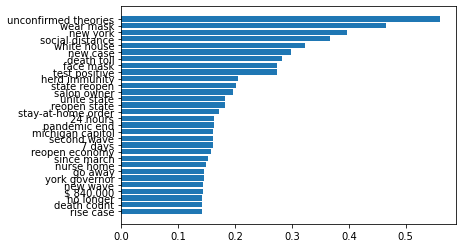

In [41]:
#lemmatization 2-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents

Resulting matrix has 13 data points and 4154 features.

[('new york governor', 0.1438219446140293), ('wear face mask', 0.13460823927413787), ('governor wear mask', 0.12701685053790304), ('michigan capitol denounce', 0.11053095066048893), ('sentence 7 days', 0.10717568632595306), ('7 days jail', 0.10717568632595306), ('link vitamin deficiency', 0.10540823712133143), ('no social distance', 0.10536757470695503), ('carnival cruise book', 0.10022668266930407), ('1,000 new case', 0.09913269724076765), ('unite state lowest', 0.09603704125275361), ('unconfirmed theories 13', 0.09341496745515723), ('wear mask public', 0.092

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


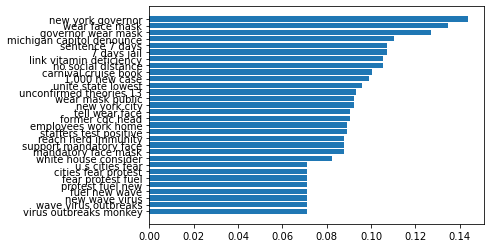

In [42]:
#lemmatization 3-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item, pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 13 data points and 1678 features.

[('new', 1.2384413538934866), ('reopen', 1.1019150987872621), ('mask', 1.0045423416471237), ('death', 0.9963795762174755), ('case', 0.8314276305114672), ('state', 0.759197736907627), ('daili', 0.7410027879653696), ('theori', 0.6610074585485768), ('unconfirm', 0.6367980703141203), ('wear', 0.635368080092094), ('peopl', 0.6246742866426628), ('die', 0.5779491796066384), ('lockdown', 0.5753636851448616), ('$', 0.572446359442819), ('no', 0.5669807119071091), ('vaccin', 0.5614179229570136), ('worker', 0.560407183508675), ('studi', 0.5567608986514448), ('million', 0.5560525576017099), ('test', 0.5397042916518415), ('get', 0.5203531610701534), ('social', 0.496067945150697), ('governor', 0.49379200572329773), ('order', 0.467701402801153), ('fauci', 0.45659778505255694), ('posit', 0.456417063562067), ('u.s.', 0.4561096292255997), ('work', 0.44837024543611037), ('find', 0.4476736675623915), ('york', 0.4474714609117105)]


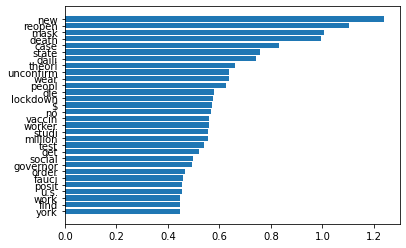

In [43]:
#stemming and lemmatization 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        lemma = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in stems]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()